# Lab | Matplotlib & Seaborn

#### Import all the libraries that are necessary.

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Challenge 1

#### Data

In [5]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x,y) and (x,z) on the axes.
There are 2 ways of doing this. Do in both ways.
Hint: Check out the nrows, ncols, and index arguments of subplots.

Also, play around with the linewidth and style. Use the ones you're most happy with.

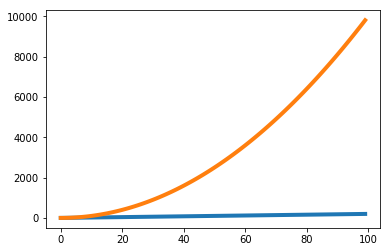

In [12]:
# OPTION 1
# Create a figure of a fixed size
plt.figure()

# First plot
plt.plot(x,y, linewidth=4)

# Second plot
plt.plot(x,z, linewidth=4)

# Show the plot
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot below

In [ ]:
# OPTION 2

# Create a figure of a fixed size and axes


# Plots


# Show the plot


#### Augmenting your previous code, resize your previous plot.
Hint: Add the figsize argument in plt.subplots()

In [ ]:
# ENHANCED VERSION to see more matplotlib features

# Variables
fs = 16 # fontsize
fw = 700 # fontweight
lw = 3 # lineweight
y_rot = 0 # ylabel rotation

# Create a figure of a fixed size and axes


# First plot adding a title and x and y labels


# Second plot adding a title and x and y labels


# Show the plot


#### Plot both y=x^2 and y=exp(x) in the same plot using normal and logarithmic scale.
Hint: Use set_xscale and set_yscale

In [ ]:
# Create a figure of a fixed size and axes


# Normal plot


# Logarithmic scale


# Show plot


In [ ]:
# ALTERNATIVE WITH LEGEND

# Create a figure of a fixed size and axes


# Normal plot


# Logarithmic scale


# Show plot


# Challenge 2

Import the Fitbit2.csv file and name your dataset fitbit. Download the data from [here](https://drive.google.com/file/d/17TW-w-izKuR7bLoa0Mnyp9YN9zEQNXq-/view?usp=sharing) and place it in the data folder. Access it through a relative path.

In [ ]:
# Read the data

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month.
Is Fitbitter more active on weekend or workdays?
All plots must be in the same jupyter notebook cell.

Hints:

- Use Months_encoded and Week_or Weekend columns.
- Use matplolib.pyplot object oriented API.
- Set your size figure to 12,4
- Explore plt.sca
- Explore plt.xticks
- Save your figures

In [ ]:
# MEDIAN STEPS BY MONTH_ENCODED
# Find the median steps for each month

# Create a figure of a fixed size and axes

# Set the current axes instance to ax[0] - Now plt methods will affect ax[0]

# Plot the weekday steps in the current axes

# Add labels, title, etc


# Save the figure


# MEDIAN STEPS BY WORK_OR_WEEKEND
# Set the current axes instance to ax[1] - Now plt methods will affect ax[1]


# Find the median steps for workdays and weekdays


# Plot the workday and weekend steps in the current axes


# Add labels, title, etc


# Save the figure


#### Write a loop to plot 3 scatter plots of the following features:

Minutes Lightly Active vs Steps
Minutes Very Active vs Steps
Minutes Sedentary vs Steps

In [ ]:
# ALTERNATIVE 1
# Create a df with the columns we are interested in 


# Create a figure of a fixed size and axes


# Iterate to draw each scatter plot


In [ ]:
# ALTERNATIVE 2
# Create a df with the columns we are interested in 


# Create a figure of a fixed size and axes


# Iterate to draw each scatter plot
